In [1]:
# Setup and Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from train import train
from model_test import *
from atk import ATTACK_CONFIGS
import torch.optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.optim as optim
from model import *
import os
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [3]:
# Training configurations
configs = [
    {'name': 'NonSpiking_WideResNet16_Clean', 'use_spike': False, 'atk': 'none', 'lr': 0.01, 'batch_size': 64, 'epochs': 50},
    {'name': 'NonSpiking_WideResNet16-GN', 'use_spike': False, 'atk': 'gn', 'lr': 0.01, 'batch_size': 64, 'epochs': 50},
    {'name': 'NonSpiking_WideResNet16-PGD', 'use_spike': False, 'atk': 'pgd', 'lr': 0.01, 'batch_size': 64, 'epochs': 50},
    {'name': 'Spiking_WideResNet16-Clean', 'use_spike': True, 'atk': 'none', 'model_size': 18, 'lr': 0.01, 'batch_size': 64, 'epochs': 50, 'T': 4},
    {'name': 'Spiking_WideResNet16-GN', 'use_spike': True, 'atk': 'gn', 'model_size': 18, 'lr': 0.01, 'batch_size': 64, 'epochs': 50, 'T': 4},
    {'name': 'Spiking_WideResNet16-PGD', 'use_spike': True, 'atk': 'pgd', 'model_size': 18, 'lr': 0.01, 'batch_size': 64, 'epochs': 50, 'T': 4}
]

In [4]:
# Training Phase

In [5]:
# # Train models with updated parameters and different raw image proportions
# training_results = {}

# # Raw image proportions to test
# raw_proportions = [0.0, 0.25, 0.5, 0.75]

# for config in configs:
#     config_results = {}
    
#     for raw_prop in raw_proportions:
#         print(f"\nTraining {config['name']} with raw image proportion {raw_prop}...")
        
#         # Extract training parameters with defaults
#         model_type = config.get('model_type', 'standard')
#         use_spike = config.get('use_spike', False)
#         print(f"use_spike: {use_spike}")
#         atk = config.get('atk', 'none')
#         epochs = 10 # config.get('epochs', 10)
#         batch_size = config.get('batch_size', 64)
#         lr = 0.001 # config.get('lr', 0.1)
#         T = config.get('T', 4)
#         optimizer = 'adamw'
        
#         # Train model with optimized parameters and specific raw image proportion
#         result = train(
#             #model_type=model_type,
#             use_spike=use_spike,
#             atk=atk,
#             epochs=epochs,
#             batch_size=batch_size,
#             lr=lr,
#             T=T,
#             optimizer_type=optimizer,
#             raw_prop=raw_prop
#         )
        
#         # Store results for this proportion
#         config_name = f"{config['name']}_raw_prop_{raw_prop:.2f}"
#         config_results[raw_prop] = result
#         print(f"Training completed for {config_name}")
#         print(f"Final test accuracy: {result['best_acc']:.2f}%")
#         print(f"Model saved to: ./weight/{model_type}_spike_{use_spike}_atk_{atk}_{optimizer}_raw_prop_{raw_prop:.2f}.pth")
    
#     # Store all proportion results for this config
#     training_results[config['name']] = config_results

# # Print summary of results
# print("\n\n========== Summary of Results ==========")
# for config_name, prop_results in training_results.items():
#     print(f"\nResults for {config_name}:")
#     for prop, result in prop_results.items():
#         print(f"  Raw Proportion {prop:.2f}: Test Accuracy {result['best_acc']:.2f}%")


Training NonSpiking_WideResNet16_Clean with raw image proportion 0.0...
use_spike: False
Training on 6000 samples, testing on 1000 samples
Attack type: none, Optimizer: adamw, Raw image proportion: 0.0
Using standard WideResNet16
Epoch [1/10], Train Loss: 0.5374, Train Acc: 85.70%, Test Acc: 85.20%
New best model saved with accuracy: 85.20%
Epoch [2/10], Train Loss: 0.1093, Train Acc: 96.77%, Test Acc: 91.10%
New best model saved with accuracy: 91.10%
Epoch [3/10], Train Loss: 0.0891, Train Acc: 97.47%, Test Acc: 96.80%
New best model saved with accuracy: 96.80%
Epoch [4/10], Train Loss: 0.0578, Train Acc: 98.32%, Test Acc: 97.80%
New best model saved with accuracy: 97.80%
Epoch [5/10], Train Loss: 0.0353, Train Acc: 99.00%, Test Acc: 97.60%
Epoch [6/10], Train Loss: 0.0396, Train Acc: 98.75%, Test Acc: 95.60%
Epoch [7/10], Train Loss: 0.0290, Train Acc: 99.13%, Test Acc: 98.50%
New best model saved with accuracy: 98.50%
Epoch [8/10], Train Loss: 0.0203, Train Acc: 99.35%, Test Acc: 9

In [6]:
# Training Results Visualization

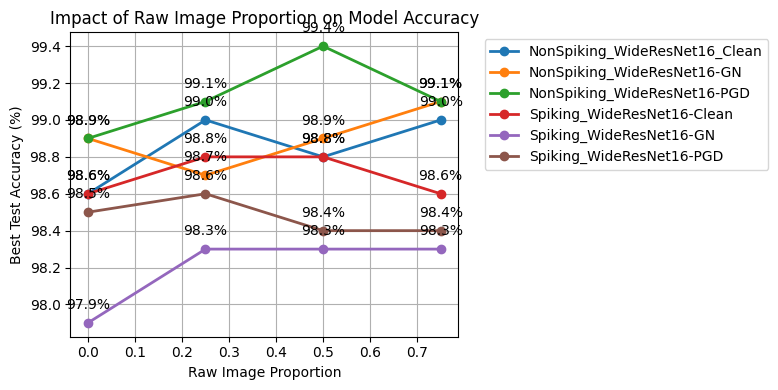

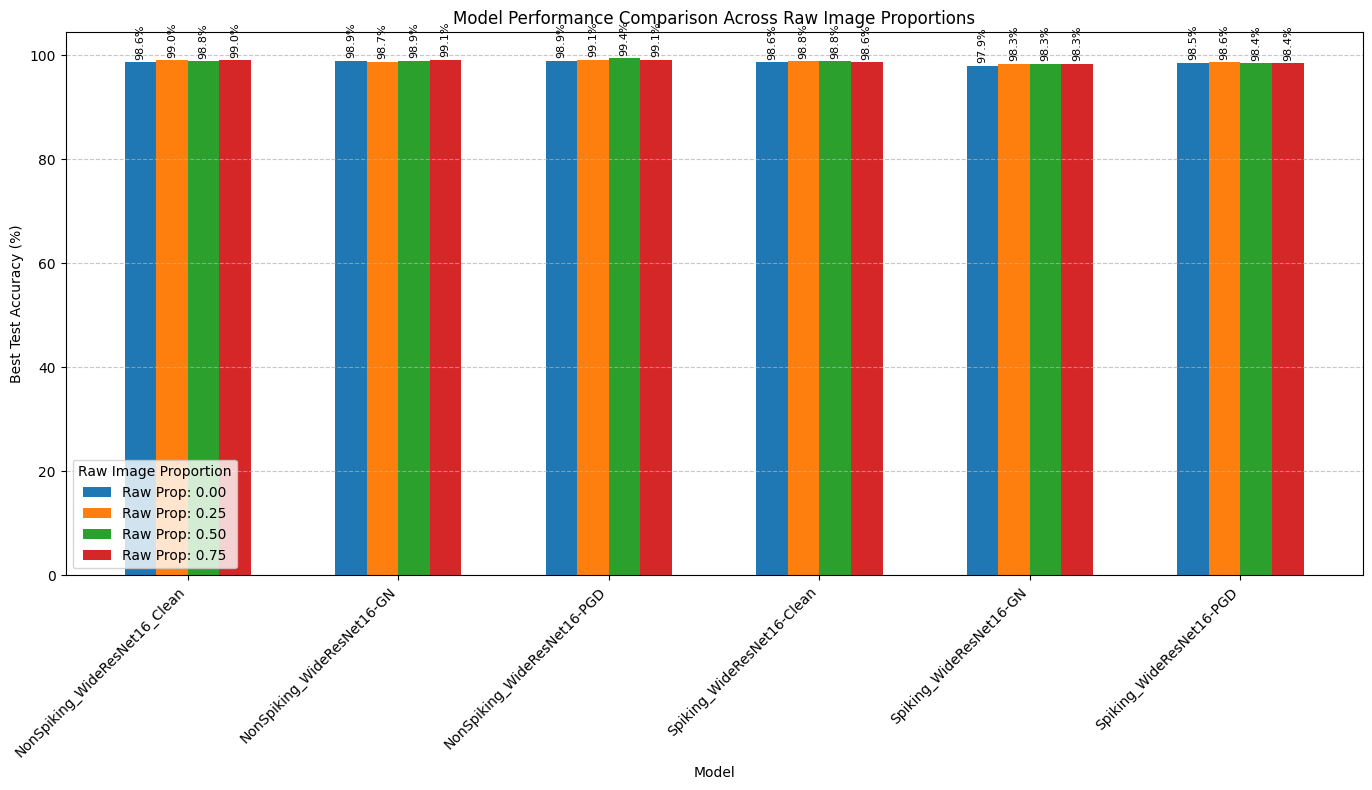

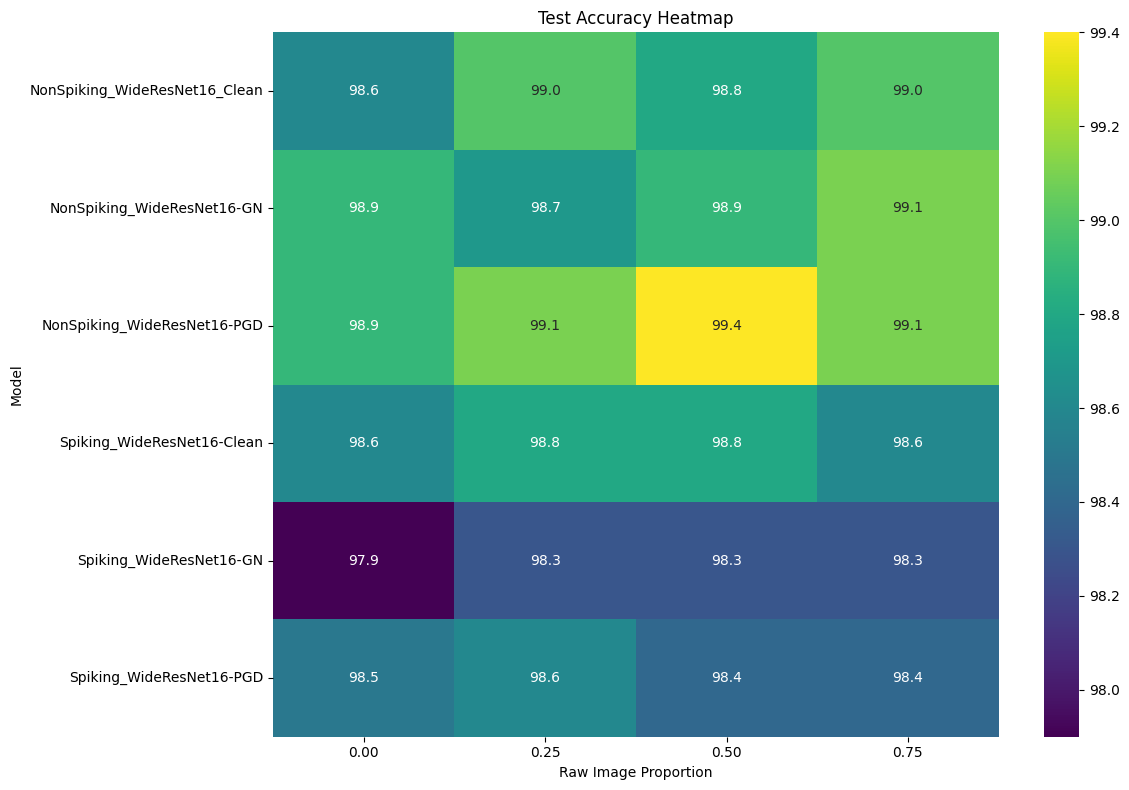

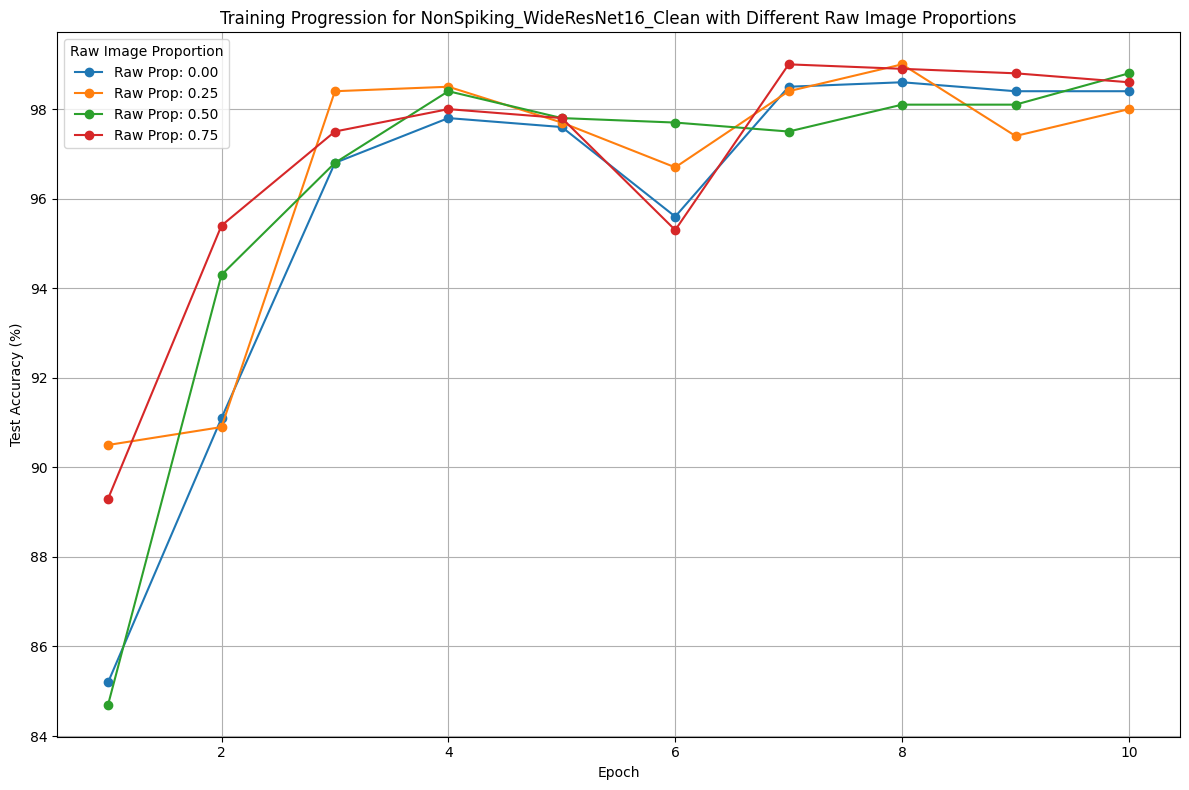


========== RESULTS SUMMARY ==========
Model                          Raw Prop   Best Acc   Final Acc  Final Loss
----------------------------------------------------------------------
NonSpiking_WideResNet16_Clean  0.00       98.60      98.40      0.0251    
NonSpiking_WideResNet16_Clean  0.25       99.00      98.00      0.0178    
NonSpiking_WideResNet16_Clean  0.50       98.80      98.80      0.0135    
NonSpiking_WideResNet16_Clean  0.75       99.00      98.60      0.0195    
----------------------------------------------------------------------
NonSpiking_WideResNet16-GN     0.00       98.90      98.90      0.0224    
NonSpiking_WideResNet16-GN     0.25       98.70      98.40      0.0179    
NonSpiking_WideResNet16-GN     0.50       98.90      96.80      0.0231    
NonSpiking_WideResNet16-GN     0.75       99.10      98.10      0.0223    
----------------------------------------------------------------------
NonSpiking_WideResNet16-PGD    0.00       98.90      98.90      0.0192   

In [56]:
# def plot_training_progress_with_proportions(training_results):
#     """
#     Creates plots to visualize the impact of raw image proportions on model performance
#     """
#     # 1. Plot test accuracy vs raw image proportion for each model
#     plt.figure(figsize=(8, 4))
    
#     for model_name, prop_results in training_results.items():
#         # Extract proportions and corresponding best accuracies
#         proportions = sorted(prop_results.keys())
#         accuracies = [prop_results[prop]['best_acc'] for prop in proportions]
        
#         # Plot line for this model
#         plt.plot(proportions, accuracies, marker='o', linestyle='-', linewidth=2, label=model_name)
    
#     plt.xlabel('Raw Image Proportion')
#     plt.ylabel('Best Test Accuracy (%)')
#     plt.title('Impact of Raw Image Proportion on Model Accuracy')
#     plt.grid(True)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
    
#     # Add text annotations for each point
#     for model_name, prop_results in training_results.items():
#         proportions = sorted(prop_results.keys())
#         accuracies = [prop_results[prop]['best_acc'] for prop in proportions]
        
#         for i, (prop, acc) in enumerate(zip(proportions, accuracies)):
#             plt.annotate(f'{acc:.1f}%', 
#                          (prop, acc),
#                          textcoords="offset points", 
#                          xytext=(0,10), 
#                          ha='center')
    
#     # Save the figure if results directory exists
#     os.makedirs('./results', exist_ok=True)
#     plt.savefig('./results/accuracy_vs_proportion.png', bbox_inches='tight')
#     plt.show()
    
#     # 2. Create bar chart comparing all models and proportions side by side
#     plt.figure(figsize=(14, 8))
    
#     # Set up the bar positions
#     models = list(training_results.keys())
#     proportions = sorted(list(training_results[models[0]].keys()))
#     num_models = len(models)
#     num_props = len(proportions)
    
#     # Calculate positions
#     bar_width = 0.15
#     index = np.arange(num_models)
    
#     # Plot bars for each proportion
#     for i, prop in enumerate(proportions):
#         accuracies = [training_results[model][prop]['best_acc'] for model in models]
#         offset = (i - num_props/2 + 0.5) * bar_width
#         bars = plt.bar(index + offset, accuracies, bar_width, 
#                        label=f'Raw Prop: {prop:.2f}')
        
#         # Add accuracy values on bars
#         for j, bar in enumerate(bars):
#             height = bar.get_height()
#             plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
#                     f'{height:.1f}%',
#                     ha='center', va='bottom', fontsize=8, rotation=90)
    
#     plt.xlabel('Model')
#     plt.ylabel('Best Test Accuracy (%)')
#     plt.title('Model Performance Comparison Across Raw Image Proportions')
#     plt.xticks(index, models, rotation=45, ha='right')
#     plt.legend(title='Raw Image Proportion')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.savefig('./results/model_comparison_by_proportion.png', bbox_inches='tight')
#     plt.show()
    
#     # 3. Heatmap of performance
#     plt.figure(figsize=(12, 8))
    
#     # Create data for heatmap
#     heatmap_data = np.zeros((len(models), len(proportions)))
#     for i, model in enumerate(models):
#         for j, prop in enumerate(proportions):
#             heatmap_data[i, j] = training_results[model][prop]['best_acc']
    
#     # Plot heatmap
#     sns.heatmap(heatmap_data, annot=True, fmt='.1f', 
#                 xticklabels=[f'{p:.2f}' for p in proportions],
#                 yticklabels=models,
#                 cmap='viridis')
#     plt.xlabel('Raw Image Proportion')
#     plt.ylabel('Model')
#     plt.title('Test Accuracy Heatmap')
#     plt.tight_layout()
#     plt.savefig('./results/accuracy_heatmap.png', bbox_inches='tight')
#     plt.show()
    
#     # 4. Plot training curves for the different proportions of one model
#     # Pick the first model as an example
#     model_to_plot = models[0]
#     plt.figure(figsize=(12, 8))
    
#     for prop, result in training_results[model_to_plot].items():
#         epochs = range(1, len(result['test_accuracies']) + 1)
#         plt.plot(epochs, result['test_accuracies'], marker='o', 
#                  label=f'Raw Prop: {prop:.2f}')
    
#     plt.xlabel('Epoch')
#     plt.ylabel('Test Accuracy (%)')
#     plt.title(f'Training Progression for {model_to_plot} with Different Raw Image Proportions')
#     plt.grid(True)
#     plt.legend(title='Raw Image Proportion')
#     plt.tight_layout()
#     plt.savefig(f'./results/{model_to_plot}_training_curves.png', bbox_inches='tight')
#     plt.show()
    
#     # 5. Print summary table
#     print("\n========== RESULTS SUMMARY ==========")
#     print(f"{'Model':<30} {'Raw Prop':<10} {'Best Acc':<10} {'Final Acc':<10} {'Final Loss':<10}")
#     print("-" * 70)
    
#     for model in models:
#         for prop in proportions:
#             result = training_results[model][prop]
#             best_acc = result['best_acc']
#             final_acc = result['test_accuracies'][-1]
#             final_loss = result['train_losses'][-1]
#             print(f"{model:<30} {prop:<10.2f} {best_acc:<10.2f} {final_acc:<10.2f} {final_loss:<10.4f}")
#         print("-" * 70)  # Separator between models

# # Call the plotting function after training
# plot_training_progress_with_proportions(training_results)

In [8]:
for config_name, result in training_results.items():
    print(config_name, result)

NonSpiking_WideResNet16_Clean {0.0: {'best_acc': 98.6, 'train_losses': [0.5373860764059615, 0.1093167170406656, 0.08911746397535218, 0.057800485678215295, 0.03530298981894838, 0.03958356914486974, 0.029043670604996224, 0.020251108500660656, 0.02488769567138119, 0.02507315065830629], 'train_accuracies': [85.7, 96.76666666666667, 97.46666666666667, 98.31666666666666, 99.0, 98.75, 99.13333333333334, 99.35, 99.21666666666667, 99.13333333333334], 'test_accuracies': [85.2, 91.1, 96.8, 97.8, 97.6, 95.6, 98.5, 98.6, 98.4, 98.4], 'raw_prop': 0.0}, 0.25: {'best_acc': 99.0, 'train_losses': [0.8044018136694077, 0.14103516868929913, 0.09083677051549262, 0.059081988666761426, 0.05593165153379929, 0.04127753427143189, 0.031522669502474523, 0.028717755389578166, 0.02690438488919407, 0.01782145669022476], 'train_accuracies': [76.98333333333333, 96.43333333333334, 97.3, 98.28333333333333, 98.3, 98.88333333333334, 99.06666666666666, 99.01666666666667, 99.06666666666666, 99.43333333333334], 'test_accuraci

In [28]:
# # Test models with different raw image proportions against various attacks
# test_results = {}

# # List of attack types to test
# attack_types = ['none', 'gn', 'pgd']

# # Raw image proportions that were used in training
# raw_proportions = [0.0, 0.25, 0.5, 0.75]

# # List of model configurations to test
# model_configs = [
#     {"name": "NonSpiking_WideResNet16_Clean", "use_spike": False, "train_attack": "none"},
#     {"name": "NonSpiking_WideResNet16-GN", "use_spike": False, "train_attack": "gn"},
#     {"name": "NonSpiking_WideResNet16-PGD", "use_spike": False, "train_attack": "pgd"},
#     {"name": "Spiking_WideResNet16-Clean", "use_spike": True, "train_attack": "none"},
#     {"name": "Spiking_WideResNet16-GN", "use_spike": True, "train_attack": "gn"},
#     {"name": "Spiking_WideResNet16-PGD", "use_spike": True, "train_attack": "pgd"}
# ]

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# # Increase batch size for testing
# test_batch_size = 256
# optimizer = 'adamw'  # Default optimizer

# # Create a nested dictionary to store all test results
# # Structure: {model_name: {raw_prop: {attack_type: {metrics}}}}
# all_test_results = {}

# for config in model_configs:
#     config_name = config["name"]
#     use_spike = config["use_spike"]
#     train_attack = config["train_attack"]
    
#     print(f"\nTesting models for {config_name}...")
#     model_results = {}
    
#     for raw_prop in raw_proportions:
#         # Construct the model path with raw proportion
#         model_path = f"./weight/standard_spike_{use_spike}_atk_{train_attack}_{optimizer}_raw_prop_{raw_prop:.2f}.pth"
#         print(f"\n  Testing model trained with raw_prop={raw_prop:.2f}: {model_path}")
        
#         # Load model once for all attacks
#         model = get_model(use_spike=use_spike)
        
#         try:
#             model.load_state_dict(torch.load(model_path))
#             model = model.to(device)
#             model.eval()
            
#             # Dictionary to store accuracies for this model variant
#             raw_prop_results = {}
            
#             # Test with different attacks
#             for attack in attack_types:
#                 print(f"    Testing with {attack} attack...")
#                 acc, class_accs, conf_matrix = test(
#                     model=model,
#                     attack_type=attack,
#                     batch_size=test_batch_size,
#                     device=device,
#                     optimizer=optimizer,
#                     eps=0.5
#                 )
                
#                 raw_prop_results[attack] = {
#                     'accuracy': acc,
#                     'class_accuracies': class_accs,
#                     'confusion_matrix': conf_matrix
#                 }
                
#                 print(f"      Accuracy: {acc:.2f}%")
            
#             model_results[raw_prop] = raw_prop_results
#         except Exception as e:
#             print(f"    Error testing {config_name} with raw_prop={raw_prop:.2f}: {e}")
#             model_results[raw_prop] = {'error': str(e)}
    
#     all_test_results[config_name] = model_results



Testing models for NonSpiking_WideResNet16_Clean...

  Testing model trained with raw_prop=0.00: ./weight/standard_spike_False_atk_none_adamw_raw_prop_0.00.pth
Using standard WideResNet16
    Testing with none attack...
In test function, attack_type: none, optimizer: adamw
Model is non-spiking
Model has 2748614 parameters

DEBUG INFORMATION:
Sample predictions:

Sample outputs for none:
  Sample 0: Label=5, Predicted=5
  Logits: [-3.0460587  -5.798838   -2.753254   -0.57807815 -5.814206    6.2302666
 -3.3841004  -2.217543   -2.233152   -2.8486042 ]
  Sample 1: Label=2, Predicted=2
  Logits: [-2.4777672  -3.7540784   6.775448   -1.372986   -2.8078861  -3.9788148
 -4.5508313   0.52410185 -3.5051837  -5.4362473 ]
  Sample 2: Label=4, Predicted=4
  Logits: [-5.0131545 -1.5147372 -2.0018787 -7.2185416  8.924921  -2.786701
 -2.4796667 -2.2388582 -4.7013035 -3.8353145]
  Sample 3: Label=1, Predicted=1
  Logits: [-3.8633242  9.828691  -3.6191552 -4.9256845 -3.0458376 -3.037551
 -1.8636808 -1.

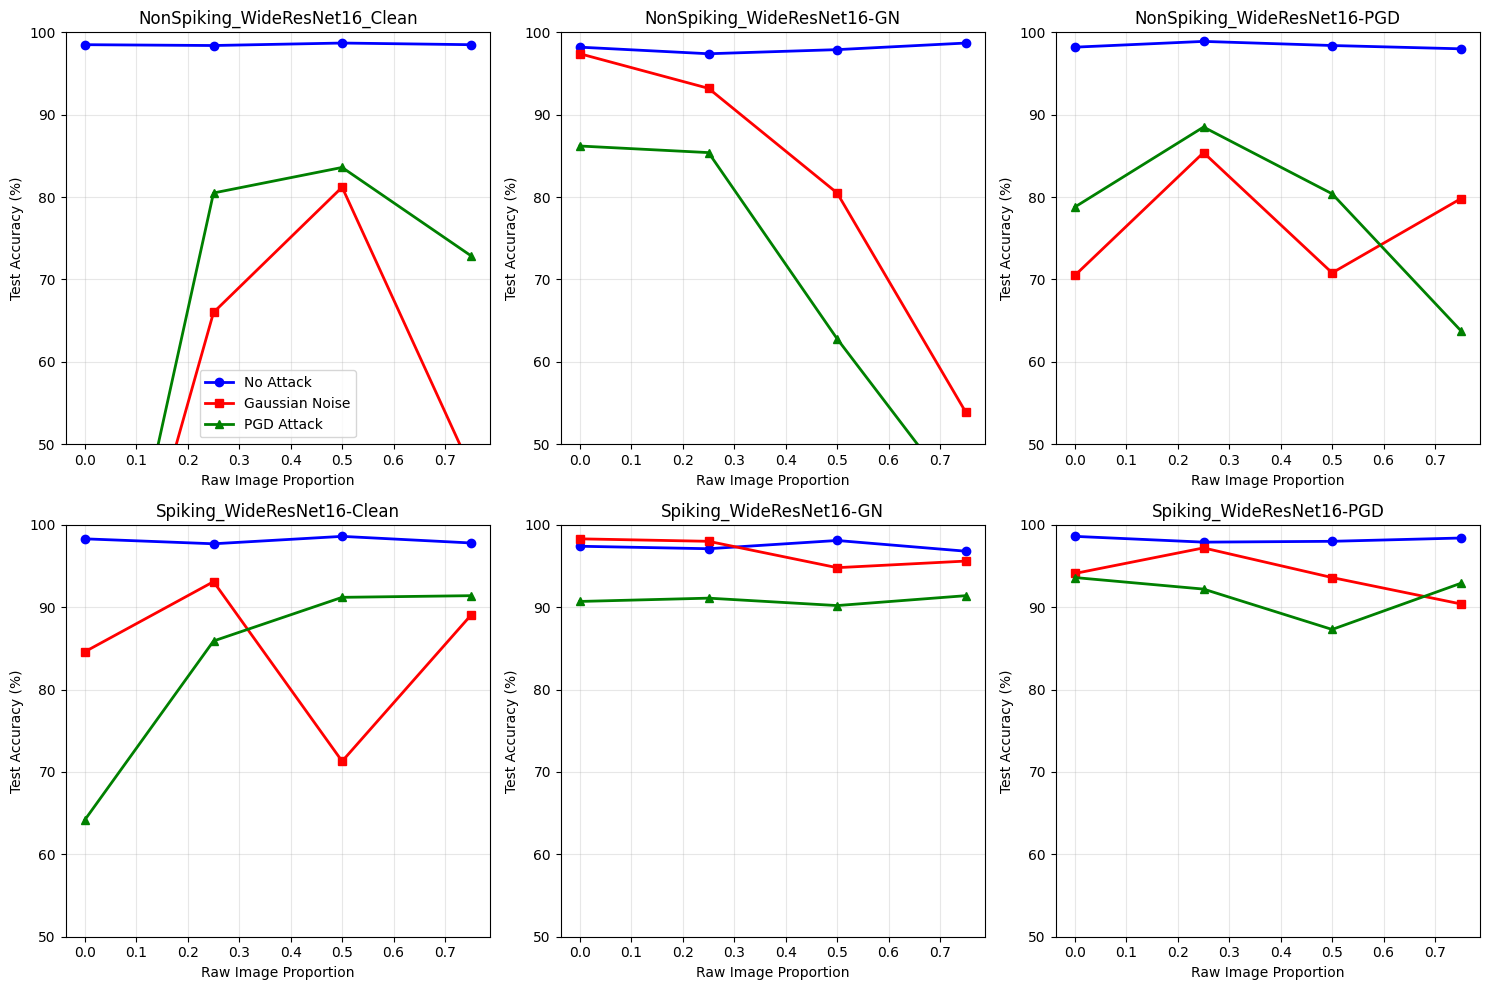

In [29]:

# # Create visualizations for the test results
# plt.figure(figsize=(15, 10))

# # Set up colors and markers for different attacks
# attack_colors = {'none': 'blue', 'gn': 'red', 'pgd': 'green'}
# attack_markers = {'none': 'o', 'gn': 's', 'pgd': '^'}
# attack_labels = {'none': 'No Attack', 'gn': 'Gaussian Noise', 'pgd': 'PGD Attack'}

# # For each model config, plot test accuracy vs raw proportion for each attack
# for i, config_name in enumerate(all_test_results.keys()):
#     plt.subplot(2, 3, i+1)
    
#     for attack in attack_types:
#         proportions = []
#         accuracies = []
        
#         for raw_prop, attack_results in all_test_results[config_name].items():
#             if attack in attack_results and 'accuracy' in attack_results[attack]:
#                 proportions.append(raw_prop)
#                 accuracies.append(attack_results[attack]['accuracy'])
        
#         if proportions:  # Only plot if there are results for this attack
#             plt.plot(proportions, accuracies, 
#                      color=attack_colors[attack], 
#                      marker=attack_markers[attack],
#                      label=attack_labels[attack],
#                      linewidth=2)
    
#     plt.title(f"{config_name}")
#     plt.xlabel("Raw Image Proportion")
#     plt.ylabel("Test Accuracy (%)")
#     plt.grid(True, alpha=0.3)
#     if i == 0:
#         plt.legend()
#     plt.ylim(50, 100)  # Set y-axis to focus on the accuracy range

# plt.tight_layout()
# os.makedirs('./results', exist_ok=True)
# plt.savefig('./results/raw_prop_attack_comparison.png', bbox_inches='tight')
# plt.show()


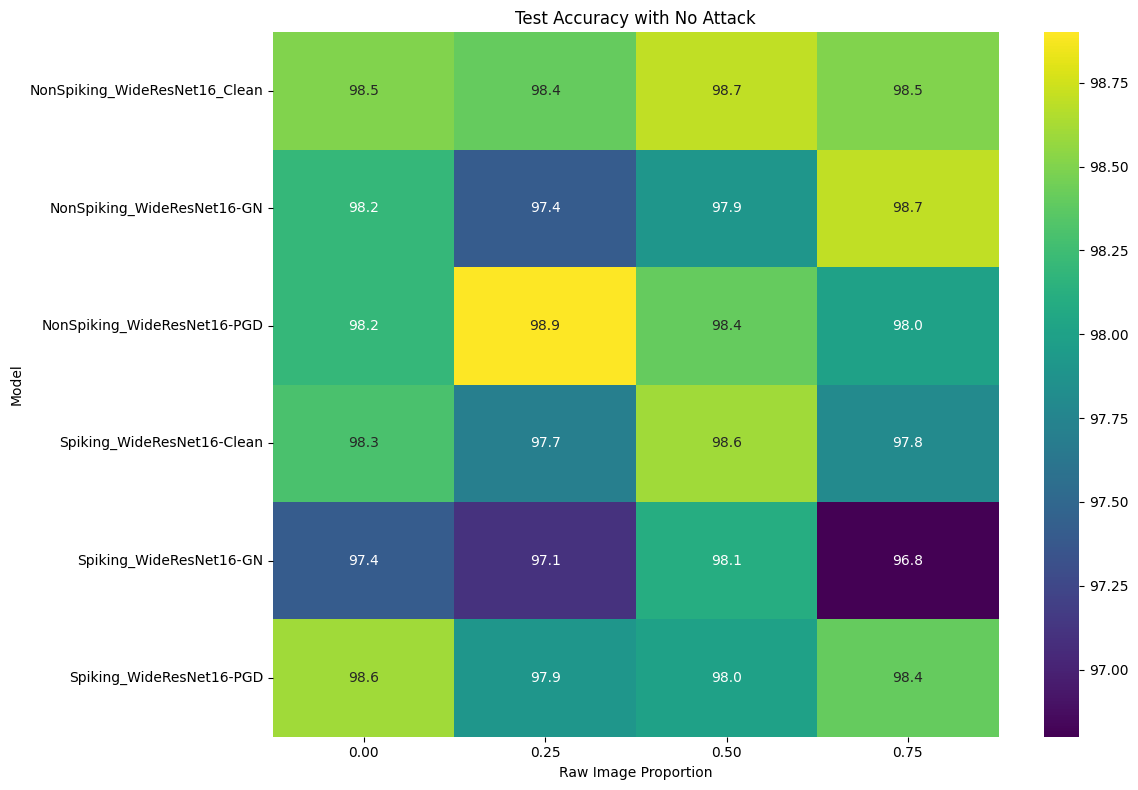

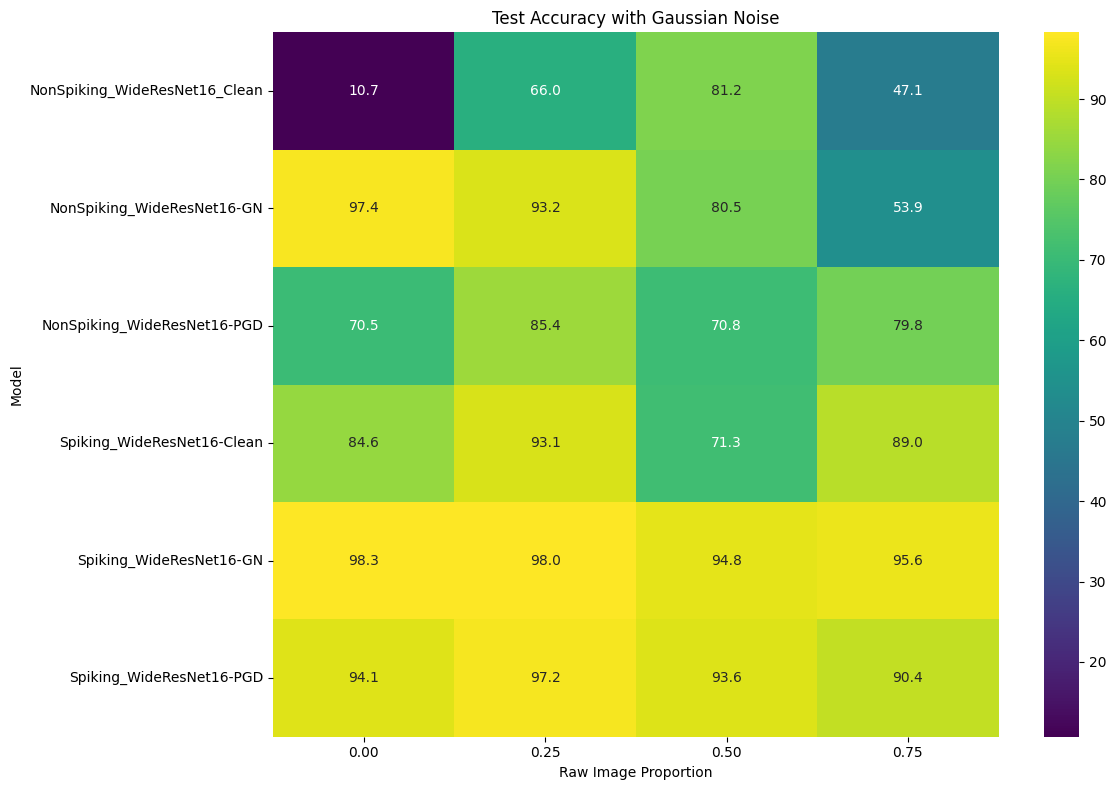

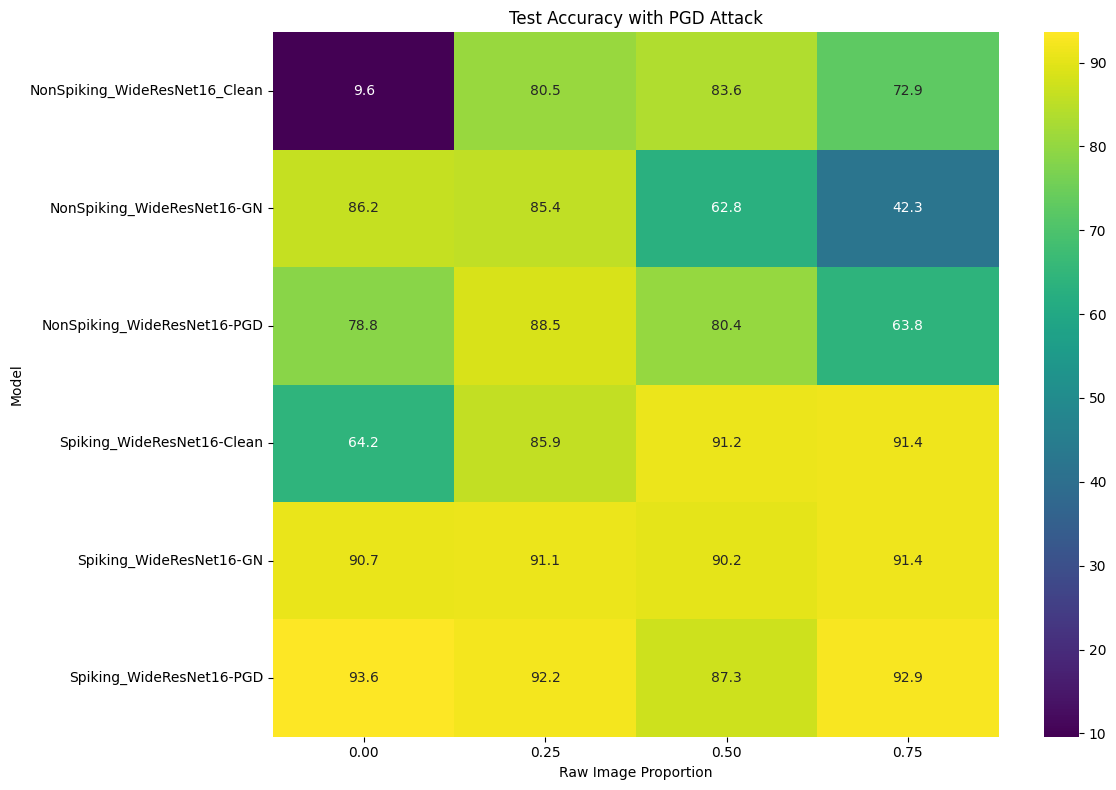

In [30]:

# # Create heatmaps to show robustness across models and raw proportions
# for attack in attack_types:
#     plt.figure(figsize=(12, 8))
    
#     # Create data for heatmap
#     models = list(all_test_results.keys())
#     proportions = raw_proportions
    
#     heatmap_data = np.zeros((len(models), len(proportions)))
#     for i, model in enumerate(models):
#         for j, prop in enumerate(proportions):
#             if prop in all_test_results[model] and attack in all_test_results[model][prop]:
#                 if 'accuracy' in all_test_results[model][prop][attack]:
#                     heatmap_data[i, j] = all_test_results[model][prop][attack]['accuracy']
#                 else:
#                     heatmap_data[i, j] = np.nan  # Mark as missing data
#             else:
#                 heatmap_data[i, j] = np.nan
    
#     # Plot heatmap
#     sns.heatmap(heatmap_data, annot=True, fmt='.1f', 
#                 xticklabels=[f'{p:.2f}' for p in proportions],
#                 yticklabels=models,
#                 cmap='viridis')
#     plt.xlabel('Raw Image Proportion')
#     plt.ylabel('Model')
#     plt.title(f'Test Accuracy with {attack_labels[attack]}')
#     plt.tight_layout()
#     plt.savefig(f'./results/accuracy_heatmap_{attack}.png', bbox_inches='tight')
#     plt.show()


In [31]:

# # Print summary table of results
# print("\n========== TEST RESULTS SUMMARY ==========")
# print(f"{'Model':<30} {'Raw Prop':<10} {'Clean Acc':<10} {'GN Acc':<10} {'PGD Acc':<10}")
# print("-" * 70)

# for model in all_test_results.keys():
#     for prop in sorted(all_test_results[model].keys()):
#         prop_results = all_test_results[model][prop]
        
#         # Extract accuracies for each attack, or mark as N/A if missing
#         clean_acc = prop_results.get('none', {}).get('accuracy', "N/A")
#         gn_acc = prop_results.get('gn', {}).get('accuracy', "N/A")
#         pgd_acc = prop_results.get('pgd', {}).get('accuracy', "N/A")
        
#         # Format as strings, with proper handling of N/A
#         clean_str = f"{clean_acc:.2f}" if isinstance(clean_acc, (int, float)) else clean_acc
#         gn_str = f"{gn_acc:.2f}" if isinstance(gn_acc, (int, float)) else gn_acc
#         pgd_str = f"{pgd_acc:.2f}" if isinstance(pgd_acc, (int, float)) else pgd_acc
        
#         print(f"{model:<30} {prop:<10.2f} {clean_str:<10} {gn_str:<10} {pgd_str:<10}")
    
#     print("-" * 70)  # Separator between models


========== TEST RESULTS SUMMARY ==========
Model                          Raw Prop   Clean Acc  GN Acc     PGD Acc   
----------------------------------------------------------------------
NonSpiking_WideResNet16_Clean  0.00       98.50      10.70      9.60      
NonSpiking_WideResNet16_Clean  0.25       98.40      66.00      80.50     
NonSpiking_WideResNet16_Clean  0.50       98.70      81.20      83.60     
NonSpiking_WideResNet16_Clean  0.75       98.50      47.10      72.90     
----------------------------------------------------------------------
NonSpiking_WideResNet16-GN     0.00       98.20      97.40      86.20     
NonSpiking_WideResNet16-GN     0.25       97.40      93.20      85.40     
NonSpiking_WideResNet16-GN     0.50       97.90      80.50      62.80     
NonSpiking_WideResNet16-GN     0.75       98.70      53.90      42.30     
----------------------------------------------------------------------
NonSpiking_WideResNet16-PGD    0.00       98.20      70.50      78.8

In [32]:
# # Get model names and attack types
# model_names = list(test_results.keys())
# attack_names = ['none', 'gn', 'pgd']  # Make sure these match your attack types

# if not model_names:
#     print("No models were successfully tested. Please check the debug output above.")
# else:
#     # Initialize the comparison matrix with NaN values
#     comparison_matrix = np.full((len(model_names), len(attack_names)), np.nan)
    
#     # Fill the matrix with accuracies
#     for i, model_name in enumerate(model_names):
#         for j, attack_name in enumerate(attack_names):
#             if attack_name in test_results[model_name]:
#                 comparison_matrix[i, j] = test_results[model_name][attack_name]['accuracy']
    
#     # Check if we have any valid values
#     if np.isnan(comparison_matrix).all():
#         print("No valid accuracy values found in the results.")
#     else:
#         # Create heatmap
#         plt.figure(figsize=(12, 8))
#         sns.heatmap(comparison_matrix, 
#                     annot=True, 
#                     fmt='.2f',
#                     xticklabels=attack_names,
#                     yticklabels=model_names,
#                     cmap='YlOrRd',
#                     vmin=0,  # Set minimum value to 0
#                     vmax=100)  # Set maximum value to 100 for accuracy percentage

#         plt.title('Model Performance Under Different Attacks')
#         plt.xlabel('Attack Type')
#         plt.ylabel('Model')
#         plt.tight_layout()
#         plt.show()

In [ ]:
# # Test models with 0.25 raw image proportion against attacks of different intensities
# # Attack intensities to test (eps values)
# attack_intensities = [0.1, 0.3, 0.5, 0.7, 0.9]

# # Attack types to test
# attack_types = ['gn', 'pgd']  # Excluding 'none' as it doesn't use intensity

# # Raw image proportion to focus on
# target_raw_prop = 0.25

# # Test batch size
# test_batch_size = 256

# # Dictionary to store test results
# # Structure: {model_name: {attack_type: {intensity: accuracy}}}
# intensity_test_results = {}

# for config in model_configs:
#     config_name = config["name"]
#     use_spike = config["use_spike"]
#     train_attack = config["train_attack"]
    
#     print(f"\nTesting {config_name} with raw_prop={target_raw_prop}...")
    
#     # Construct the model path with target raw proportion
#     model_path = f"./weight/standard_spike_{use_spike}_atk_{train_attack}_{optimizer}_raw_prop_{target_raw_prop:.2f}.pth"
    
#     if not os.path.exists(model_path):
#         print(f"  Model file not found: {model_path}")
#         continue
    
#     # Load model once for all attack intensities
#     model = get_model(use_spike=use_spike)
    
#     try:
#         model.load_state_dict(torch.load(model_path))
#         model = model.to(device)
#         model.eval()
        
#         # Dictionary to store results for this model
#         model_results = {}
        
#         # First test with no attack as baseline
#         print(f"  Testing with no attack (baseline)...")
#         baseline_acc, _, _ = test(
#             model=model,
#             attack_type='none',
#             batch_size=test_batch_size,
#             device=device,
#             optimizer=optimizer
#         )
#         print(f"    Baseline accuracy: {baseline_acc:.2f}%")
        
#         # Test with different attack types and intensities
#         for attack in attack_types:
#             attack_results = {'baseline': baseline_acc}
#             print(f"  Testing with {attack} attack at different intensities...")
            
#             for intensity in attack_intensities:
#                 print(f"    Testing intensity: {intensity}")
#                 try:
#                     acc, class_accs, conf_matrix = test(
#                         model=model,
#                         attack_type=attack,
#                         batch_size=test_batch_size,
#                         device=device,
#                         optimizer=optimizer,
#                         eps=intensity  # Pass the intensity as eps parameter
#                     )
                    
#                     attack_results[intensity] = acc
#                     print(f"      Accuracy: {acc:.2f}%")
#                 except Exception as e:
#                     print(f"      Error testing with {attack} at intensity {intensity}: {e}")
#                     attack_results[intensity] = None
            
#             model_results[attack] = attack_results
        
#         intensity_test_results[config_name] = model_results
#     except Exception as e:
#         print(f"  Error loading model: {e}")
#         intensity_test_results[config_name] = {'error': str(e)}



Testing NonSpiking_WideResNet16_Clean with raw_prop=0.25...
Using standard WideResNet16
  Testing with no attack (baseline)...
In test function, attack_type: none, optimizer: adamw
Model is non-spiking
Model has 2748614 parameters

DEBUG INFORMATION:
Sample predictions:

Sample outputs for none:
  Sample 0: Label=8, Predicted=8
  Logits: [-1.8957689 -3.7456121 -3.4601912 -5.4352894 -3.1099865 -0.9125531
  0.5137267 -6.9654994  6.768907  -3.5915318]
  Sample 1: Label=1, Predicted=1
  Logits: [-3.4338713  9.949564  -3.8434129 -5.280376  -2.4791887 -3.2103693
 -1.0224739 -2.7150862 -3.1760442 -3.6592984]
  Sample 2: Label=9, Predicted=9
  Logits: [-4.5152006  -6.80863    -4.8844805  -6.016205    1.4814273  -2.1846263
 -2.1091428  -4.1907315  -0.73895824  7.7394376 ]
  Sample 3: Label=8, Predicted=0
  Logits: [ 3.6334198 -4.73864   -2.3691707 -4.835334  -2.786423  -2.3101828
 -2.8034859 -3.1427655  2.3668954 -0.4149892]
  Sample 4: Label=4, Predicted=4
  Logits: [-5.3033895 -4.5792637 -4.

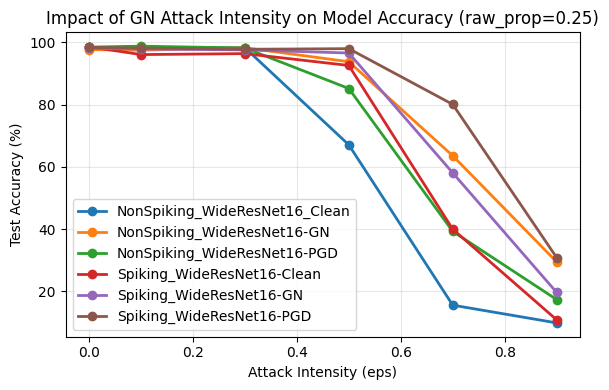

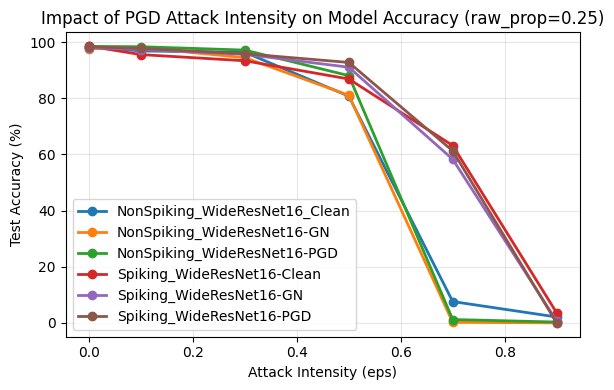

In [ ]:

# # Create visualizations
# # 1. Line plots showing accuracy vs. attack intensity for each model and attack type
# for attack in attack_types:
#     plt.figure(figsize=(6, 4))
    
#     for model_name, model_results in intensity_test_results.items():
#         if attack in model_results:
#             # Extract intensities and accuracies
#             intensities = [0] + attack_intensities  # Adding 0 for baseline
#             accuracies = [model_results[attack]['baseline']]  # Start with baseline accuracy
            
#             # Add accuracies for each intensity
#             for intensity in attack_intensities:
#                 if intensity in model_results[attack] and model_results[attack][intensity] is not None:
#                     accuracies.append(model_results[attack][intensity])
#                 else:
#                     accuracies.append(np.nan)  # Use NaN for missing data
            
#             # Plot line for this model
#             plt.plot(intensities, accuracies, marker='o', linewidth=2, label=model_name)
    
#     plt.xlabel('Attack Intensity (eps)')
#     plt.ylabel('Test Accuracy (%)')
#     plt.title(f'Impact of {attack.upper()} Attack Intensity on Model Accuracy (raw_prop={target_raw_prop})')
#     plt.grid(True, alpha=0.3)
#     plt.legend(loc='best')
#     plt.tight_layout()
#     plt.show()


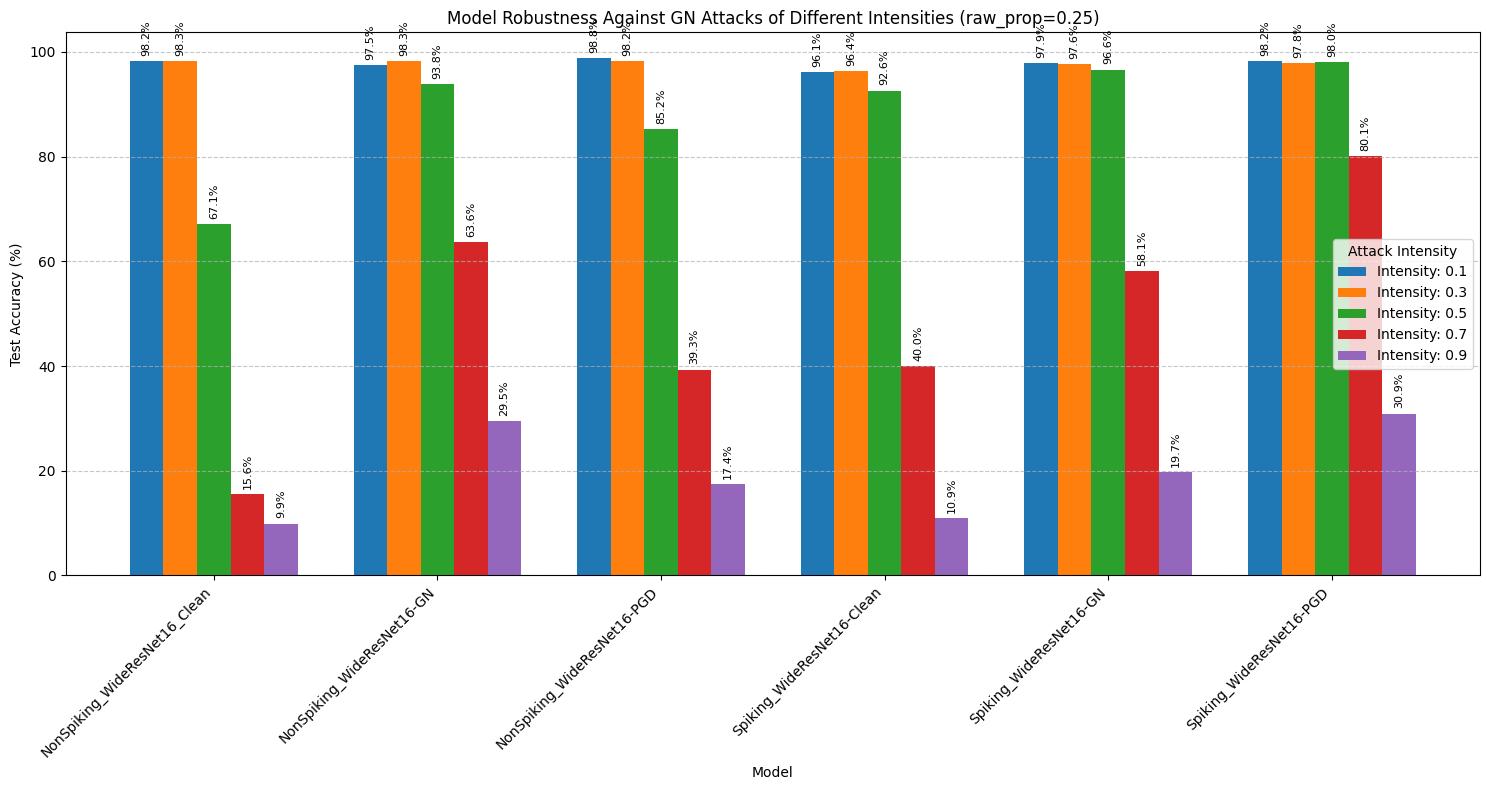

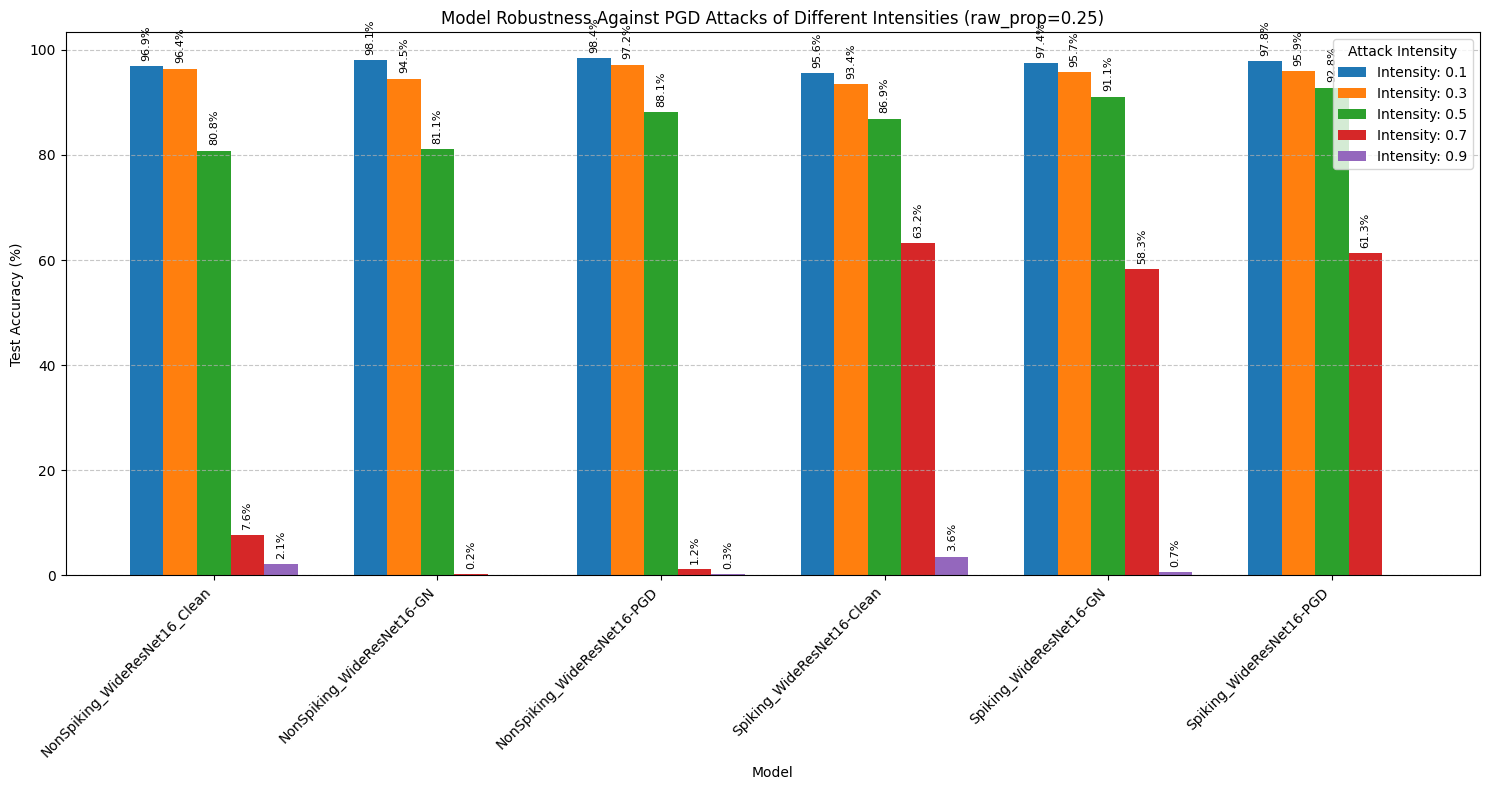

In [41]:

# # 2. Bar chart comparing all models' robustness against different attack intensities
# for attack in attack_types:
#     plt.figure(figsize=(15, 8))
    
#     # Prepare data
#     models = list(intensity_test_results.keys())
#     model_indices = np.arange(len(models))
#     width = 0.15  # Width of bars
    
#     # Plot bars for each intensity
#     for i, intensity in enumerate(attack_intensities):
#         accuracies = []
        
#         for model in models:
#             if (attack in intensity_test_results[model] and 
#                 intensity in intensity_test_results[model][attack] and 
#                 intensity_test_results[model][attack][intensity] is not None):
#                 accuracies.append(intensity_test_results[model][attack][intensity])
#             else:
#                 accuracies.append(0)  # Use 0 for missing data in the bar chart
        
#         offset = (i - len(attack_intensities)/2 + 0.5) * width
#         bars = plt.bar(model_indices + offset, accuracies, width, 
#                       label=f'Intensity: {intensity}')
        
#         # Add accuracy values on top of bars
#         for j, bar in enumerate(bars):
#             height = bar.get_height()
#             if height > 0:  # Only add text for bars with data
#                 plt.text(bar.get_x() + bar.get_width()/2., height + 1,
#                         f'{height:.1f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
#     plt.xlabel('Model')
#     plt.ylabel('Test Accuracy (%)')
#     plt.title(f'Model Robustness Against {attack.upper()} Attacks of Different Intensities (raw_prop={target_raw_prop})')
#     plt.xticks(model_indices, models, rotation=45, ha='right')
#     plt.legend(title='Attack Intensity')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()


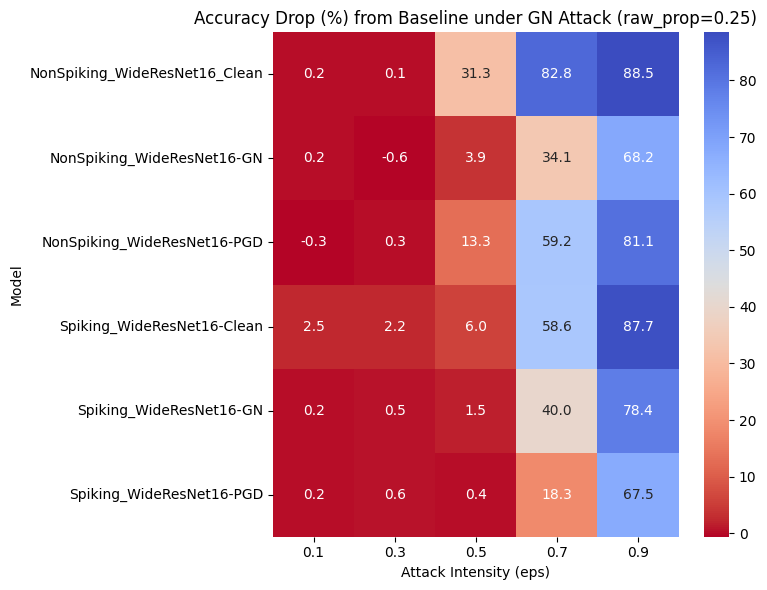

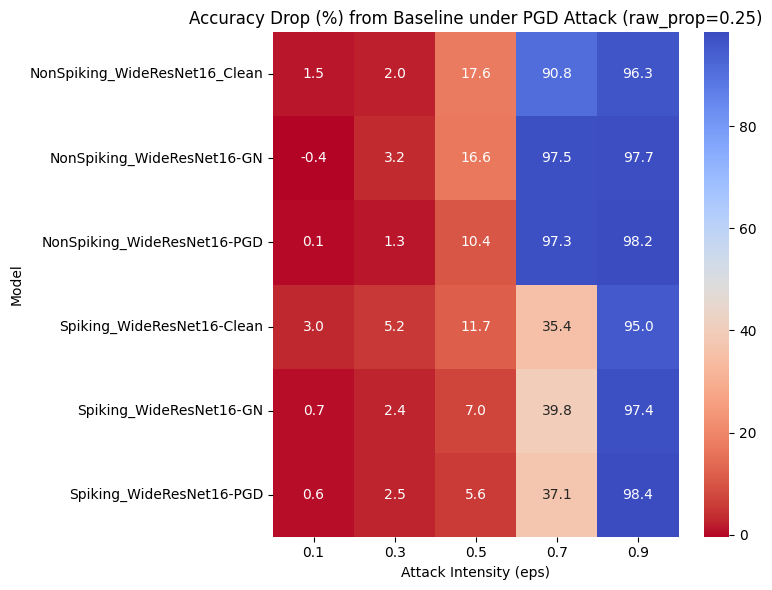

In [ ]:

# # 3. Heatmap of accuracy drop from baseline for each model and attack intensity
# for attack in attack_types:
#     plt.figure(figsize=(8, 6))
    
#     # Create data for heatmap
#     models = list(intensity_test_results.keys())
    
#     heatmap_data = np.zeros((len(models), len(attack_intensities)))
#     for i, model in enumerate(models):
#         if attack in intensity_test_results[model]:
#             baseline = intensity_test_results[model][attack].get('baseline', 100)
            
#             for j, intensity in enumerate(attack_intensities):
#                 if intensity in intensity_test_results[model][attack] and intensity_test_results[model][attack][intensity] is not None:
#                     # Calculate accuracy drop as a percentage
#                     acc = intensity_test_results[model][attack][intensity]
#                     drop = baseline - acc
#                     heatmap_data[i, j] = drop
#                 else:
#                     heatmap_data[i, j] = np.nan
    
#     # Plot heatmap
#     sns.heatmap(heatmap_data, annot=True, fmt='.1f', 
#                 xticklabels=[f'{p:.1f}' for p in attack_intensities],
#                 yticklabels=models,
#                 cmap='coolwarm_r')  # Using reverse coolwarm so red = larger drop (worse)
#     plt.xlabel('Attack Intensity (eps)')
#     plt.ylabel('Model')
#     plt.title(f'Accuracy Drop (%) from Baseline under {attack.upper()} Attack (raw_prop={target_raw_prop})')
#     plt.tight_layout()
#     plt.show()


In [43]:

# # Print summary table
# print("\n========== ATTACK INTENSITY TEST RESULTS (raw_prop=0.25) ==========")

# for attack in attack_types:
#     print(f"\n--- {attack.upper()} Attack Results ---")
#     header = "Model".ljust(30) + "Baseline".ljust(10)
#     for intensity in attack_intensities:
#         header += f"eps={intensity:.1f}".ljust(10)
#     print(header)
#     print("-" * (30 + 10 * (len(attack_intensities) + 1)))
    
#     for model in models:
#         if attack in intensity_test_results[model]:
#             row = model.ljust(30)
#             baseline = intensity_test_results[model][attack].get('baseline', "N/A")
#             row += f"{baseline:.2f}%".ljust(10) if isinstance(baseline, (int, float)) else "N/A".ljust(10)
            
#             for intensity in attack_intensities:
#                 acc = intensity_test_results[model][attack].get(intensity, "N/A")
#                 row += f"{acc:.2f}%".ljust(10) if isinstance(acc, (int, float)) else "N/A".ljust(10)
            
#             print(row)
#     print("-" * (30 + 10 * (len(attack_intensities) + 1)))


========== ATTACK INTENSITY TEST RESULTS (raw_prop=0.25) ==========

--- GN Attack Results ---
Model                         Baseline  eps=0.1   eps=0.3   eps=0.5   eps=0.7   eps=0.9   
------------------------------------------------------------------------------------------
NonSpiking_WideResNet16_Clean 98.40%    98.20%    98.30%    67.10%    15.60%    9.90%     
NonSpiking_WideResNet16-GN    97.70%    97.50%    98.30%    93.80%    63.60%    29.50%    
NonSpiking_WideResNet16-PGD   98.50%    98.80%    98.20%    85.20%    39.30%    17.40%    
Spiking_WideResNet16-Clean    98.60%    96.10%    96.40%    92.60%    40.00%    10.90%    
Spiking_WideResNet16-GN       98.10%    97.90%    97.60%    96.60%    58.10%    19.70%    
Spiking_WideResNet16-PGD      98.40%    98.20%    97.80%    98.00%    80.10%    30.90%    
------------------------------------------------------------------------------------------

--- PGD Attack Results ---
Model                         Baseline  eps=0.1   eps=0.3

In [ ]:
# Train models with different optimizers and 0.25 raw image proportion
raw_prop = 0.25
optimizers = ['sgd', 'adam', 'adamw']
epochs = 10  # Adjust as needed
test_eps = 0.5  # Attack intensity for testing

# Dictionary to store training and testing results
optimizer_results = {}

for config in configs:
    config_name = config['name']
    use_spike = config.get('use_spike', False)
    atk = config.get('atk', 'none')
    batch_size = config.get('batch_size', 64)
    lr = 0.001
    T = config.get('T', 4)
    
    print(f"\n{'-'*50}")
    print(f"Training {config_name} with different optimizers (raw_prop={raw_prop})")
    print(f"{'-'*50}")
    
    optimizer_models = {}
    
    for opt in optimizers:
        print(f"\nTraining with {opt.upper()} optimizer...")
        
        # Train model with current optimizer
        result = train(
            use_spike=use_spike,
            atk=atk,
            epochs=epochs,
            batch_size=batch_size,
            lr=lr,
            T=T,
            optimizer_type=opt,
            raw_prop=raw_prop
        )
        
        # Store results and model path
        model_path = f"./weight/standard_spike_{use_spike}_atk_{atk}_{opt}_raw_prop_{raw_prop:.2f}.pth"
        optimizer_models[opt] = {
            'training_result': result,
            'model_path': model_path
        }
        
        print(f"Training completed with {opt.upper()}")
        print(f"Best accuracy: {result['best_acc']:.2f}%")
        print(f"Final loss: {result['train_losses'][-1]:.4f}")
        print(f"Model saved to: {model_path}")

    # Testing phase
    print(f"\nTesting {config_name} models with eps={test_eps}...")
    
    for opt in optimizers:
        model_info = optimizer_models[opt]
        model_path = model_info['model_path']
        
        print(f"\nTesting model trained with {opt.upper()}...")
        
        # Load model
        model = get_model(use_spike=use_spike)
        model.load_state_dict(torch.load(model_path))
        model = model.to(device)
        model.eval()
        
        # Test with no attack (baseline)
        print("  Testing with no attack (baseline)...")
        baseline_acc, _, _ = test(
            model=model,
            attack_type='none',
            batch_size=batch_size,
            device=device,
            optimizer=opt
        )
        print(f"  Baseline accuracy: {baseline_acc:.2f}%")
        
        # Test with attacks
        attack_results = {'baseline': baseline_acc}
        
        for attack_type in ['gn', 'pgd']:
            print(f"  Testing with {attack_type.upper()} attack (eps={test_eps})...")
            try:
                acc, class_accs, _ = test(
                    model=model,
                    attack_type=attack_type,
                    batch_size=batch_size,
                    device=device,
                    optimizer=opt,
                    eps=test_eps
                )
                attack_results[attack_type] = acc
                print(f"  {attack_type.upper()} attack accuracy: {acc:.2f}%")
            except Exception as e:
                print(f"  Error testing with {attack_type}: {e}")
                attack_results[attack_type] = None
        
        # Store testing results
        optimizer_models[opt]['testing_results'] = attack_results
    
    optimizer_results[config_name] = optimizer_models


In [ ]:

# Visualize training progression for different optimizers
plt.figure(figsize=(15, 20))
plot_count = 0

for i, (config_name, opt_results) in enumerate(optimizer_results.items()):
    # Plot training loss
    plot_count += 1
    plt.subplot(len(optimizer_results), 3, plot_count)
    
    for opt in optimizers:
        if opt in opt_results:
            losses = opt_results[opt]['training_result']['train_losses']
            epochs_range = range(1, len(losses) + 1)
            plt.plot(epochs_range, losses, marker='o', label=opt.upper())
    
    plt.title(f"{config_name} - Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot training accuracy
    plot_count += 1
    plt.subplot(len(optimizer_results), 3, plot_count)
    
    for opt in optimizers:
        if opt in opt_results:
            accs = opt_results[opt]['training_result']['train_accuracies']
            epochs_range = range(1, len(accs) + 1)
            plt.plot(epochs_range, accs, marker='o', label=opt.upper())
    
    plt.title(f"{config_name} - Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot test accuracy
    plot_count += 1
    plt.subplot(len(optimizer_results), 3, plot_count)
    
    for opt in optimizers:
        if opt in opt_results:
            accs = opt_results[opt]['training_result']['test_accuracies']
            epochs_range = range(1, len(accs) + 1)
            plt.plot(epochs_range, accs, marker='o', label=opt.upper())
    
    plt.title(f"{config_name} - Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:

# Bar chart comparing attack robustness by optimizer
plt.figure(figsize=(15, 10))

for i, (config_name, opt_results) in enumerate(optimizer_results.items()):
    plt.subplot(2, 3, i+1)
    
    # Data preparation
    opt_labels = []
    baseline_accs = []
    gn_accs = []
    pgd_accs = []
    
    for opt in optimizers:
        if opt in opt_results and 'testing_results' in opt_results[opt]:
            test_results = opt_results[opt]['testing_results']
            
            opt_labels.append(opt.upper())
            baseline_accs.append(test_results.get('baseline', 0))
            gn_accs.append(test_results.get('gn', 0))
            pgd_accs.append(test_results.get('pgd', 0))
    
    x = np.arange(len(opt_labels))
    width = 0.25
    
    # Plot bars
    plt.bar(x - width, baseline_accs, width, label='No Attack')
    plt.bar(x, gn_accs, width, label=f'GN (eps={test_eps})')
    plt.bar(x + width, pgd_accs, width, label=f'PGD (eps={test_eps})')
    
    plt.title(f"{config_name}")
    plt.xlabel("Optimizer")
    plt.ylabel("Accuracy (%)")
    plt.xticks(x, opt_labels)
    plt.grid(True, alpha=0.3, axis='y')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Print summary table of results
print("\n========== OPTIMIZER COMPARISON RESULTS ==========")
print(f"{'Model':<30} {'Optimizer':<10} {'Best Acc':<10} {'Epochs':<10} {'Baseline':<10} {'GN (0.5)':<10} {'PGD (0.5)':<10}")
print("-" * 90)

for config_name, opt_results in optimizer_results.items():
    for opt in optimizers:
        if opt in opt_results:
            train_result = opt_results[opt]['training_result']
            test_result = opt_results[opt].get('testing_results', {})
            
            best_acc = train_result['best_acc']
            best_epoch = train_result['test_accuracies'].index(best_acc) + 1
            baseline = test_result.get('baseline', "N/A")
            gn_acc = test_result.get('gn', "N/A")
            pgd_acc = test_result.get('pgd', "N/A")
            
            # Format as strings
            best_acc_str = f"{best_acc:.2f}%" if isinstance(best_acc, (int, float)) else best_acc
            baseline_str = f"{baseline:.2f}%" if isinstance(baseline, (int, float)) else baseline
            gn_str = f"{gn_acc:.2f}%" if isinstance(gn_acc, (int, float)) else gn_acc
            pgd_str = f"{pgd_acc:.2f}%" if isinstance(pgd_acc, (int, float)) else pgd_acc
            
            print(f"{config_name:<30} {opt.upper():<10} {best_acc_str:<10} {best_epoch:<10} {baseline_str:<10} {gn_str:<10} {pgd_str:<10}")
    
    print("-" * 90)  # Separator between models

In [44]:
# for config in configs:
#     model_name = config['name']
#     if model_name not in test_results:
#         print(f"Warning: Model {model_name} not found in test results")
#         continue
        
#     for attack_name in ['none', 'gn', 'pgd']:
#         if attack_name not in test_results[model_name]:
#             print(f"Warning: Attack {attack_name} not found for model {model_name}")
#             continue
            
#         plt.figure(figsize=(15, 5))
        
#         # Per-class accuracy bar plot
#         plt.subplot(1, 2, 1)
#         class_acc = test_results[model_name][attack_name]['class_accuracies']
#         plt.bar(range(10), class_acc)
#         plt.xlabel('Digit')
#         plt.ylabel('Accuracy (%)')
#         plt.title(f'{model_name} - {attack_name}: Per-class Accuracy')
#         plt.grid(True)
        
#         # Confusion matrix
#         plt.subplot(1, 2, 2)
#         conf_matrix = test_results[model_name][attack_name]['confusion_matrix']
#         # Use '.0f' format for floats that should be displayed as integers
#         sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues')
#         plt.xlabel('Predicted')
#         plt.ylabel('True')
#         plt.title(f'{model_name} - {attack_name}: Confusion Matrix')
        
#         plt.tight_layout()
#         plt.show()

In [45]:
# Attack Effectiveness Comparison

In [46]:
# plt.figure(figsize=(12, 6))
# x = np.arange(len(model_names))
# width = 0.15
# multiplier = 0

# for attack_name in attack_names:
#     attack_accuracies = [test_results[model_name][attack_name]['accuracy'] 
#                        for model_name in model_names]
#     offset = width * multiplier
#     plt.bar(x + offset, attack_accuracies, width, label=attack_name)
#     multiplier += 1

# plt.xlabel('Model')
# plt.ylabel('Accuracy (%)')
# plt.title('Model Performance Comparison Under Different Attacks')
# plt.xticks(x + width * (len(attack_names)-1)/2, model_names, rotation=45)
# plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [47]:
# Summary Statistics

In [48]:
# # Map your preferred display names to the actual keys in test_results
# attack_name_mapping = {
#     'Clean': 'none',
#     'GN (weak)': 'gn',
#     'PGD (strong)': 'pgd'
# }

# print("\nSummary Statistics:")
# print("-" * 80)
# # Update this header to match your preferred names
# print(f"{'Model':<30} {'Clean':>10} {'GN (weak)':>10} {'PGD (strong)':>10}")
# print("-" * 80)

# for model_name in model_names:
#     stats = []
#     try:
#         # Use the mapping to get the correct keys
#         stats = [
#             test_results[model_name][attack_name_mapping['Clean']]['accuracy'],
#             test_results[model_name][attack_name_mapping['GN (weak)']]['accuracy'],
#             test_results[model_name][attack_name_mapping['PGD (strong)']]['accuracy']
#         ]
        
#         print(f"{model_name:<30}", end="")
#         for stat in stats:
#             print(f"{stat:>10.2f}", end="")
#         print()
#     except KeyError as e:
#         print(f"{model_name:<30} Error: Missing key {e}")